# Data Science and Business Analytics Internship
## GRIP @ The Sparks Foundation
### BY: PUTRI SABRINA



## TASK 1 - Prediction Using Supervised Machine Learning

Predict the percentage of a student based on his study hours each day using simple linear regression. 2 variables and the data are given to help with the prediction.



## STEP 0 - Importing the Required Libraries

In [125]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## STEP 1 - Reading the data from source

In [144]:
# Reading data from remote link
df=pd.read_csv('https://bit.ly/w-data')
print("Data Imported Successfully")

Data Imported Successfully


In [145]:
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## STEP 2 - Checking the Null Values

In [165]:
# Checking for missing data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Data cleaning is not required since no null values are found.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [130]:
# Dataset description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## STEP 3 - Input Data Visualization

Plot the given data on 2-D graph to have clearer view on the dataset so we manually might be able to find the relationship between the two parameters which are Hours and Scores.

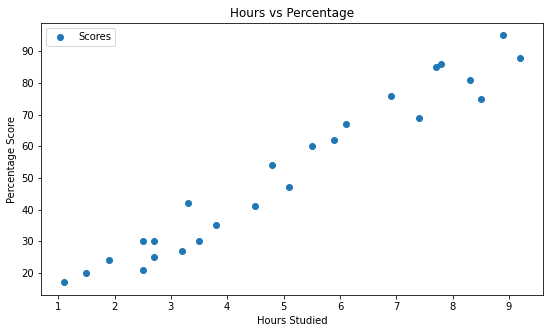

In [169]:
# Data visualization
%matplotlib inline
df.plot(x='Hours', y='Scores', style='o', figsize=(9,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Note: From the figure above, it can be seen that there is a positive linear relation and we can say that the two variables are linearly dependent on each other. It is because the longer a student study, the higher he his score gets.

## STEP 4 - Dataset Split

Division of data into "attributes" (inputs) and "labels" (outputs).

In [132]:
x=df.iloc[:, :-1].values #Attribute
y=df.iloc[:, 1].values #Labels

Splitting the dataset into the Training set and Test set for prediction

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [134]:
# Print the shapes
print("X train.shape =", x_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape =", x_test.shape)
print("Y test.shape =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape = (5, 1)
Y test.shape = (5,)


## STEP 5 - Building the Model

In [135]:
# Fitting Simple Linear Regression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
print("Training Complete")

Training Complete


## STEP 6 - Plotting the Line of Regression

In [136]:
print('Accuracy of Simple Linear Regression on training set: {:.2f}'.format(linreg.score(x_train, y_train)))
print('Accuracy of Simple Linear Regression on test set: {:.2f}'.format(linreg.score(x_test, y_test)))
print ("Coefficient :", linreg.coef_)
print ("Intercept :", linreg.intercept_)

Accuracy of Simple Linear Regression on training set: 0.95
Accuracy of Simple Linear Regression on test set: 0.95
Coefficient : [9.91065648]
Intercept : 2.018160041434683


#### VISUALIZING THE TRAINING SET RESULTS

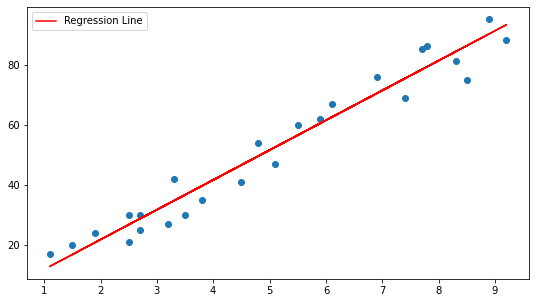

In [168]:
# Plotting the regression line
line=linreg.coef_*x + linreg.intercept_

# Plotting for the test data
plt.figure(figsize=(9,5))
plt.scatter(x,y)
plt.plot(x, line,color='red', label='Regression Line')
plt.legend()
plt.show()

#### VISUALIZING THE TEST SET RESULTS

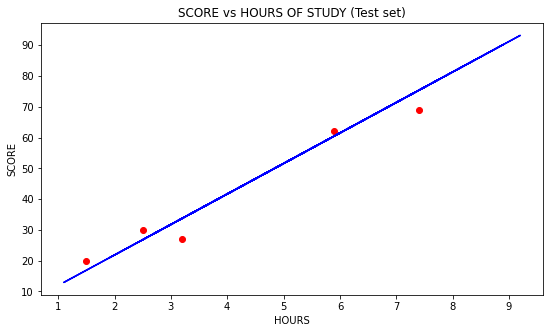

In [167]:
plt.figure(figsize=(9,5))
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, linreg.predict(x_train), color = 'blue')
plt.title('SCORE vs HOURS OF STUDY (Test set)')
plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.show()

## STEP 7 - Making Predictions

In [138]:
# prediction
print(x_test)
y_pred=linreg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [180]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [181]:
# Estimating training and test score
print("Training Score:", linreg.score(x_train,y_train))
print("Test Score:", linreg.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


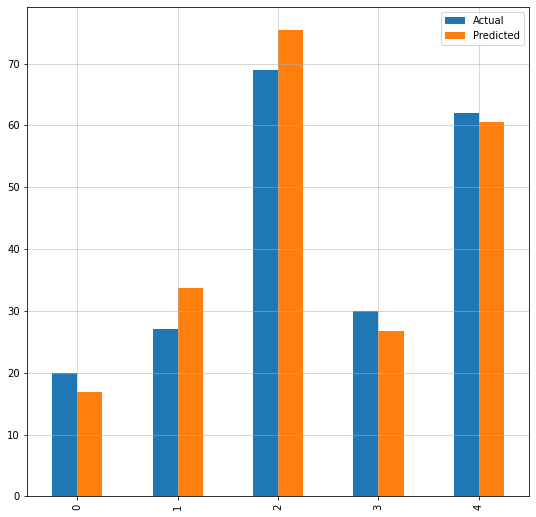

In [183]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(9,9))
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.show()

In [184]:
# Testing
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = linreg.predict(test)
print("Numbber of Hours: {}".format(hours))
print("Predicted Score: {}".format(own_pred[0]))

Numbber of Hours: 9.25
Predicted Score: 93.69173248737538


## STEP 8 - Evaluating the Model

The final step is important because it evaluates the performance of different algorithms on a particular dataset.

In [185]:
# Evaluation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


R-squared shows 94.55%, This means that the algorithm has proven good for the given data.
It can be said that the model's accuracy is 94.55%

Note: In practive we will never see a regression model with an R2 of 100%

### Thank You